In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [8]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [11]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [12]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [13]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\acer\AppData\Local\Temp\ipykernel_8284\3090101260.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
C:\

changed code after the warning

In [15]:
# Get the number of missing values in 'Age_imputed'
num_missing = X_train['Age_imputed'].isnull().sum()

# Fill missing values in 'Age_imputed' with random samples from 'Age'
X_train.loc[X_train['Age_imputed'].isnull(), 'Age_imputed'] = X_train['Age'].dropna().sample(num_missing, replace=True).values

In [16]:
# Get the number of missing values in 'Age_imputed'
num_missing = X_test['Age_imputed'].isnull().sum()

# Fill missing values in 'Age_imputed' with random samples from 'Age' in X_train
X_test.loc[X_test['Age_imputed'].isnull(), 'Age_imputed'] = X_train['Age'].dropna().sample(num_missing, replace=True).values

In [17]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([16.  , 45.  , 54.  , 22.  , 60.  , 29.  , 17.  , 51.  , 33.  ,
        2.  , 61.  , 56.  , 28.5 , 27.  , 23.  , 19.  , 38.  , 31.  ,
       23.  , 19.  , 25.  , 33.  ,  9.  , 34.  , 42.  , 30.  , 24.  ,
        4.  , 57.  , 29.  , 18.  , 25.  , 21.  , 31.  , 23.  , 32.  ,
       21.  , 66.  , 34.  ,  4.  , 19.  , 25.  , 18.  , 50.  , 22.  ,
       16.  , 34.  , 24.  , 30.5 , 37.  , 28.  , 20.  , 36.  , 39.  ,
       50.  , 61.  , 30.  , 15.  , 32.5 ,  1.  , 32.  , 65.  , 20.  ,
       51.  , 35.  , 23.5 , 14.  , 30.  , 22.  ,  3.  , 27.  , 33.  ,
       58.  , 58.  , 59.  , 36.  , 27.  , 21.  , 34.  , 24.  , 25.  ,
        0.67, 35.  , 17.  ,  3.  , 30.  ,  9.  , 38.  , 57.  , 49.  ,
       31.  , 11.  , 21.  , 28.  , 28.  , 16.  , 30.  , 24.  , 28.  ,
       23.  ,  9.  , 19.  , 45.  , 22.  , 18.  , 19.  , 22.  , 42.  ,
       44.  , 25.  , 19.  , 29.  , 28.  , 41.  , 27.  , 36.  , 28.5 ,
       22.  , 40.  , 40.  ,  4.  , 36.  , 21.  , 28.  , 65.  , 29.  ,
       40.  , 30.  ,

In [18]:
X_train['Age'].isnull().sum()

np.int64(148)

In [19]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,9.0
493,71.0,49.5042,71.0
527,NaN,221.7792,42.0


C:\Users\acer\AppData\Local\Temp\ipykernel_8284\2642582470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
C:\Users\acer\AppData\Local\Temp\ipykernel_8284\2642582470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age

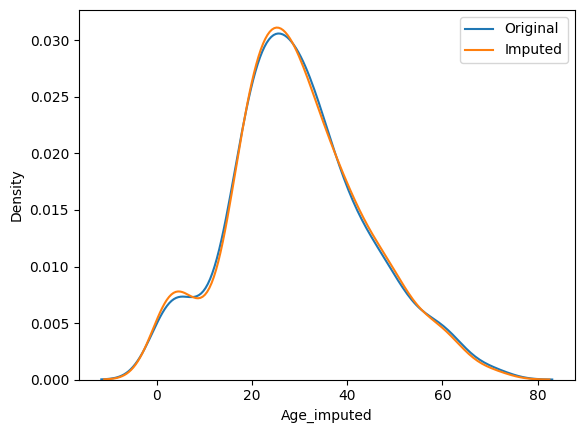

In [24]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

code after warning

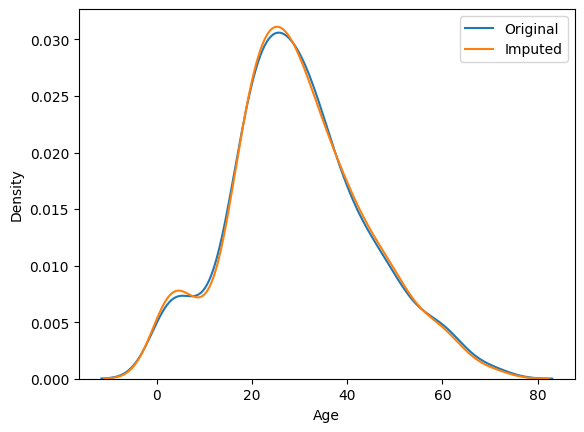

In [34]:
sns.kdeplot(X_train['Age'],label='Original')
sns.kdeplot(X_train['Age_imputed'],label = 'Imputed')

plt.legend()
plt.show()

#### Why displot Might Not Be Ideal Here

displot is designed for creating separate plots (e.g., faceted plots or multiple subplots). If you want to overlay two KDEs on the same axes, kdeplot is more straightforward.

To overlay KDEs using displot, you need to use the hue parameter, but it requires the data to be in a long format (which might not be necessary for your case).

In [39]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  202.63079527785678


In [40]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,52.189322
Age,71.512440,204.349513,204.349513
Age_imputed,52.189322,204.349513,202.630795


<Axes: >

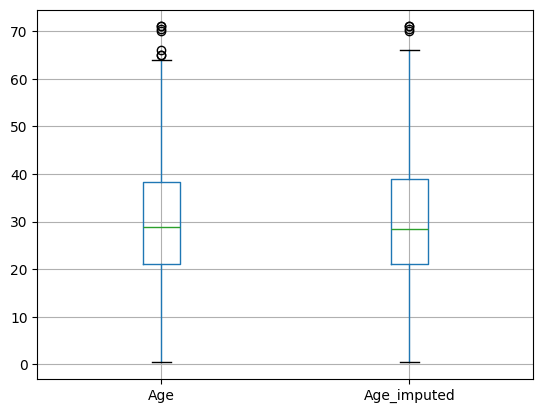

In [41]:
X_train[['Age', 'Age_imputed']].boxplot()

In [ ]:
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

In [42]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [43]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [44]:
data.isnull().mean() * 100


FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [45]:
X = data
y = data['SalePrice']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [47]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [48]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
978,NaN,TA,110000,TA,NaN
131,TA,TA,244000,TA,TA
1056,Gd,TA,185850,TA,Gd
85,TA,TA,260000,TA,TA
890,Po,TA,122900,TA,Po


In [49]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
 
X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\acer\AppData\Local\Temp\ipykernel_8284\856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual']

In [50]:
# Fill missing values in 'GarageQual_imputed' with random samples from 'GarageQual'
num_missing_train = X_train['GarageQual_imputed'].isnull().sum()
X_train.loc[X_train['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = (
    X_train['GarageQual'].dropna().sample(num_missing_train, replace=True).values
)

num_missing_test = X_test['GarageQual_imputed'].isnull().sum()
X_test.loc[X_test['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = (
    X_train['GarageQual'].dropna().sample(num_missing_test, replace=True).values
)

In [51]:
# Fill missing values in 'FireplaceQu_imputed' with random samples from 'FireplaceQu'
num_missing_train = X_train['FireplaceQu_imputed'].isnull().sum()
X_train.loc[X_train['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = (
    X_train['FireplaceQu'].dropna().sample(num_missing_train, replace=True).values
)

num_missing_test = X_test['FireplaceQu_imputed'].isnull().sum()
X_test.loc[X_test['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = (
    X_train['FireplaceQu'].dropna().sample(num_missing_test, replace=True).values
)

In [52]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [53]:
temp

,original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.036815
Gd,0.009973,0.010274
Po,0.000907,0.001712
Ex,0.000907,0.000856


In [54]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.648709
TA,0.412439,0.538721
Fa,0.040917,0.054994
Po,0.027823,0.037037
Ex,0.024550,0.031425


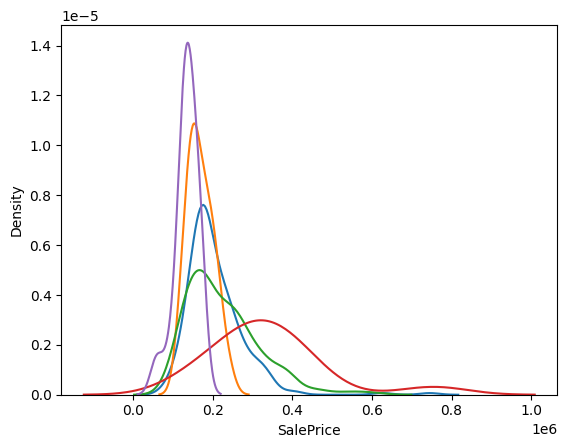

In [57]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],label=category)
plt.show()

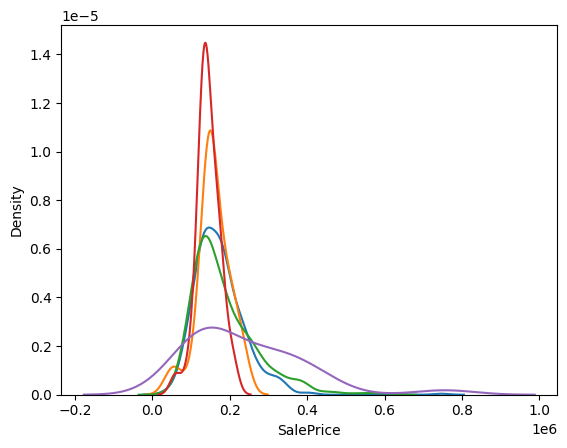

In [58]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],label=category)
plt.show()